## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [3]:
ufo_df = pd.read_csv("ufo_sightings.csv")

### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [4]:
no_null_ufo_df = ufo_df.dropna()
no_null_ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53562 entries, 0 to 64682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    53562 non-null  int64  
 1   Date_Time            53562 non-null  object 
 2   City                 53562 non-null  object 
 3   State/Province       53562 non-null  object 
 4   Country              53562 non-null  object 
 5   UFO_Shape            53562 non-null  object 
 6   Length_of_Encounter  53562 non-null  float64
 7   Described_Duration   53562 non-null  object 
 8   Description          53562 non-null  object 
 9   Date_Documented      53562 non-null  object 
 10  Latitude             53562 non-null  float64
 11  Longitude            53562 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.3+ MB


### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [5]:
clean_ufo_df = no_null_ufo_df.drop(["Described_Duration", "Description", "Date_Documented"], axis=1)
clean_ufo_df.head()

,#,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
0,0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [6]:
clean_ufo_df["Date_Time"] = pd.to_datetime(clean_ufo_df["Date_Time"])
clean_ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53562 entries, 0 to 64682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   #                    53562 non-null  int64         
 1   Date_Time            53562 non-null  datetime64[ns]
 2   City                 53562 non-null  object        
 3   State/Province       53562 non-null  object        
 4   Country              53562 non-null  object        
 5   UFO_Shape            53562 non-null  object        
 6   Length_of_Encounter  53562 non-null  float64       
 7   Latitude             53562 non-null  float64       
 8   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 4.1+ MB


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0, 0.5, 'Shape Frequency')

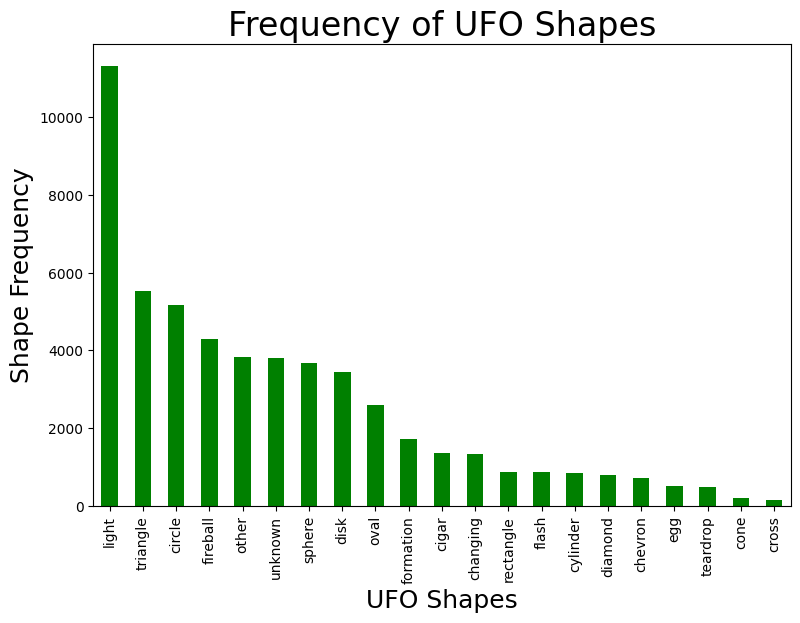

In [7]:
shape_counts = clean_ufo_df["UFO_Shape"].value_counts()
my_bar_shape_count = shape_counts.plot.bar(figsize=(9,6), color="#008000")
plt.title("Frequency of UFO Shapes", fontsize=24)
plt.xlabel("UFO Shapes", fontsize=18)
plt.ylabel("Shape Frequency", fontsize=18)

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

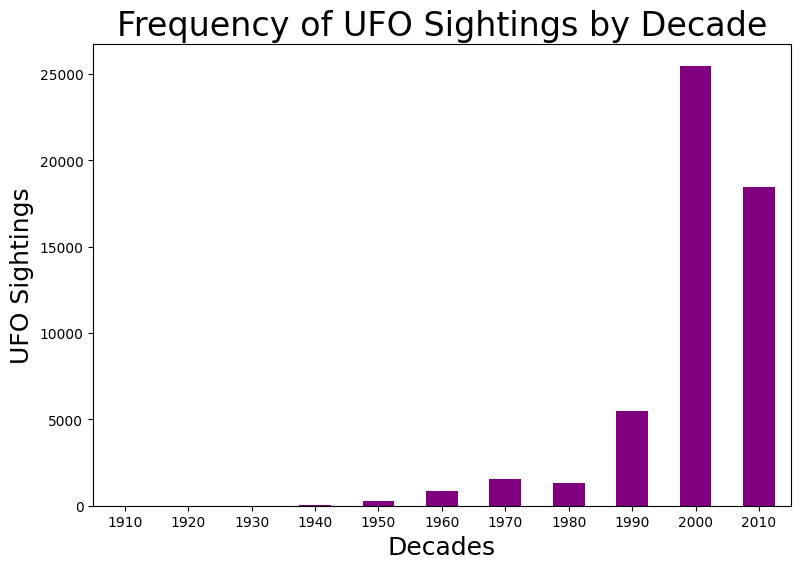

In [8]:
clean_ufo_df["Year"] = clean_ufo_df["Date_Time"].dt.year
clean_ufo_df["Decade"] = (clean_ufo_df["Year"] // 10) * 10
clean_ufo_df["Decade"].value_counts().sort_index().plot.bar(figsize=(9,6), color="#800080")
plt.title("Frequency of UFO Sightings by Decade", fontsize=24)
plt.xlabel("Decades", fontsize=18)
plt.ylabel("UFO Sightings", fontsize=18)
plt.xticks(rotation="horizontal");


### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

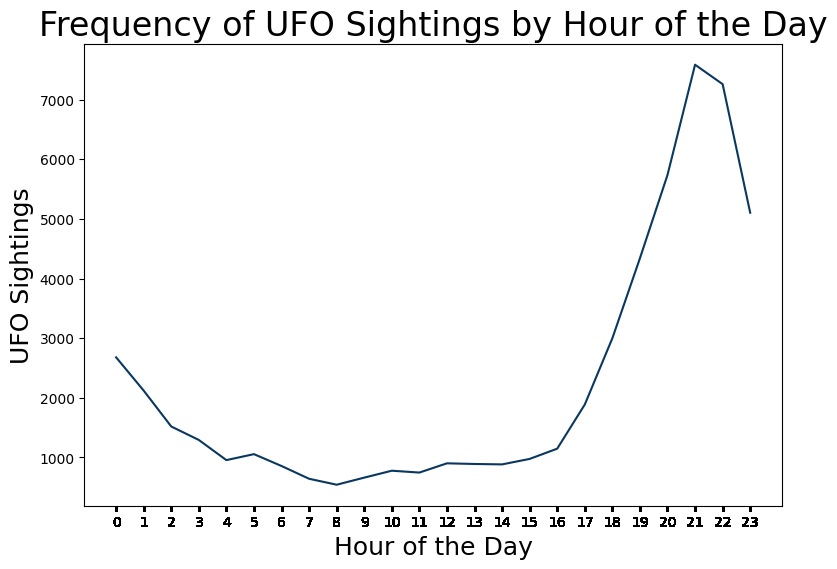

In [9]:
clean_ufo_df["Hour"] = clean_ufo_df["Date_Time"].dt.hour
clean_ufo_df.head()
clean_ufo_df["Hour"].value_counts().sort_index().plot.line(figsize=(9,6), color="#093760")
plt.title("Frequency of UFO Sightings by Hour of the Day", fontsize=24)
plt.xlabel("Hour of the Day", fontsize=18)
plt.ylabel("UFO Sightings", fontsize=18)
plt.xticks(clean_ufo_df["Hour"]);

### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Light is the most frequent shape reported, which is a bit ambiguous. The next most frequently reported shape is a triangle.

2. Which shape is least frequently reported?
    * The least frequently reported shape is a cross.

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * The highest number of UFO sightings happen between 20:00 and 21:00 (8-9pm) local time

4. Are there other factors that may account for this pattern in the data?
    * Since light is the most common shape reported, it makes sense that evening hours are when the most sightings tend to occur. Light would be more noticeable in the night sky than during the daytime.

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * UFO sightings increased gradually from 1950 - 1970/80, which could be attributed to the possibility of space travel becoming an actualized human experience. Once humans were able to get to space, it became more plausible that there were spacecraft from other nations or planets that might be seen in the sky. The greater spike in sighting in 1990 - 2000 could be due to a mix of factors, including more technical advancements and the growing use of the internet as a forum to discuss things like UFO sightings, curiosity and fears about the implications of entering a new millenium, and broader acceptance of odd occurences and imagining of other worlds within pop culture. In the 2010's there seems to be a mindset shift - maybe things like the 2008 recession forced people to get their heads out of the clouds and come back down to earth, or earth itself becomes a more important focus in general. There also seems to be a greater skepticism of unexplainable events and pessimism that enters the zeitgeist in the 2010's.

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * If you're interested in encountering a UFO, be aware of unusual lights appearing between 7-11 pm. Most UFO sightings are in the form of strange lights and happen between those evening hours. You could also find internet forums with additional recommendations by location or specific sighting events.


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0, 0.5, 'Shape Frequency')

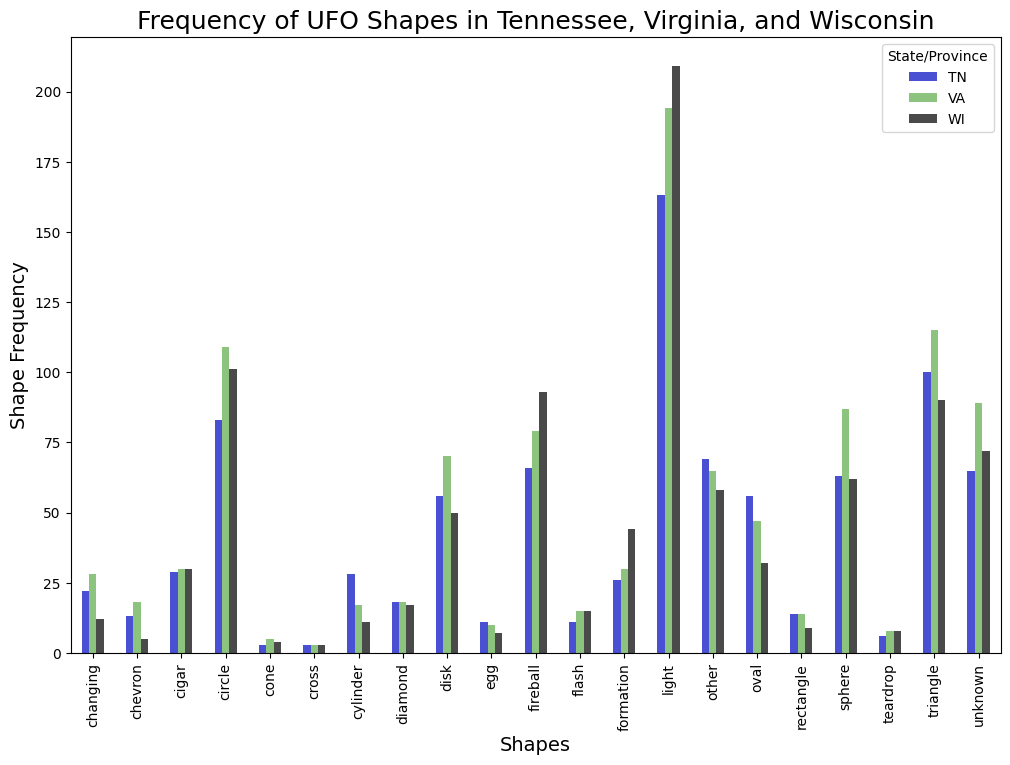

In [56]:
WI_sightings = clean_ufo_df[clean_ufo_df["State/Province"] == "WI"]
VA_sightings = clean_ufo_df[clean_ufo_df["State/Province"] == "VA"]
TN_sightings = clean_ufo_df[clean_ufo_df["State/Province"] == "TN"]
target_states_sightings = pd.concat([WI_sightings, VA_sightings, TN_sightings])
target_states_sightings.groupby(["UFO_Shape", "State/Province"]).size().unstack().plot(kind="bar", figsize= (12,8), color= ["#4951d2", "#8CC47F", "#4a4a4a"])
plt.title("Frequency of UFO Shapes in Tennessee, Virginia, and Wisconsin", fontsize=18)
plt.xlabel("Shapes", fontsize=14)
plt.ylabel("Shape Frequency", fontsize=14)